In [123]:
import json
import numpy as np
import pandas as pd

In [124]:
with open('../EvolutionaryFramework/results/MOEA_D/2023_04_06_18:45:44/result_1.json') as user_file:
  parsed_json = json.load(user_file)
  
# print(json.dumps(parsed_json, indent = 4, sort_keys=True))

In [125]:
data = []
metaParameters = []
for elem in parsed_json:
    if elem == "metaParameters":
        metaParameters.append({
            'algorithmName': parsed_json[elem]["algorithmName"],
            'populationSize': parsed_json[elem]["populationSize"],
            'numberOfBars': parsed_json[elem]["numberOfBars"],
            'maxNumberOfNotes': parsed_json[elem]["maxNumberOfNotes"],
            'representationType': parsed_json[elem]["representationType"],
            'melodyKeyValue': parsed_json[elem]["melodyKeyValue"],
            'melodyKeyType': parsed_json[elem]["melodyKeyType"],
            'crossoverType': parsed_json[elem]["crossoverType"],
            'mutationType': parsed_json[elem]["mutationType"],
            'mutationProbability': parsed_json[elem]["mutationProbability"],
            'selectionType': parsed_json[elem]["selectionType"],
            'matingPoolSelectionType': parsed_json[elem]["matingPoolSelectionType"],
            'numberOfGenerations': parsed_json[elem]["numberOfGenerations"],
            'criteria': parsed_json[elem]["criteria"],
            'numberOfNeighbours': parsed_json[elem]["numberOfNeighbours"]
        })
metaParameters_df = pd.DataFrame(metaParameters)   


for elem in parsed_json:
        if elem == "experiment":
            for generation in parsed_json[elem]:
                for individual in parsed_json[elem][generation]:
                    dictionary = {}
                    dictionary = {
                        'generation': generation,
                        'melody': individual['melody'],
                    }
                    for criterion in metaParameters_df['criteria'].values[0]:
                        dictionary[criterion] = individual['fitness'][criterion]
                    data.append(dictionary)
data_df = pd.DataFrame(data)

In [126]:
data_df.head()

,generation,melody,STABILITY,TENSION
0,generation_1,81/0.125 68/0.0625 57/0.6875 48/0.0625 80/0.06...,-410.0,-300.0
1,generation_1,-1/0.125 51/0.75 80/0.0625 80/0.0625 R/0.1875 ...,-470.0,-255.0
2,generation_1000,71/0.0625 68/0.0625 59/0.0625 57/0.0625 69/0.0...,-30.0,140.0
3,generation_1000,78/0.0625 68/0.0625 71/0.0625 69/0.0625 59/0.0...,-35.0,260.0
4,generation_1000,78/0.0625 68/0.0625 71/0.0625 69/0.0625 59/0.0...,-40.0,355.0


In [127]:
metaParameters_df.head()

,algorithmName,populationSize,numberOfBars,maxNumberOfNotes,representationType,melodyKeyValue,melodyKeyType,crossoverType,mutationType,mutationProbability,selectionType,matingPoolSelectionType,numberOfGenerations,criteria,numberOfNeighbours
0,MOEA/D,100,4,16,f1,A,MAJOR,ONE_POINT_CROSSOVER,SIMPLE,0.8,,,1000,"[STABILITY, TENSION]",20


In [128]:
data_df.head()

,generation,melody,STABILITY,TENSION
0,generation_1,81/0.125 68/0.0625 57/0.6875 48/0.0625 80/0.06...,-410.0,-300.0
1,generation_1,-1/0.125 51/0.75 80/0.0625 80/0.0625 R/0.1875 ...,-470.0,-255.0
2,generation_1000,71/0.0625 68/0.0625 59/0.0625 57/0.0625 69/0.0...,-30.0,140.0
3,generation_1000,78/0.0625 68/0.0625 71/0.0625 69/0.0625 59/0.0...,-35.0,260.0
4,generation_1000,78/0.0625 68/0.0625 71/0.0625 69/0.0625 59/0.0...,-40.0,355.0


In [129]:
data_df.loc[0]

generation                                         generation_1
melody        81/0.125 68/0.0625 57/0.6875 48/0.0625 80/0.06...
STABILITY                                                -410.0
TENSION                                                  -300.0
Name: 0, dtype: object

In [130]:
generation = data_df[data_df["generation"] == "generation_1000"]

In [131]:
list_of_fronts = []
for criterion in metaParameters_df['criteria'].values[0]:
    criterion_individuals = []
    for individual in generation[criterion]:
        criterion_individuals.append(individual)
    list_of_fronts.append(criterion_individuals)


In [132]:
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

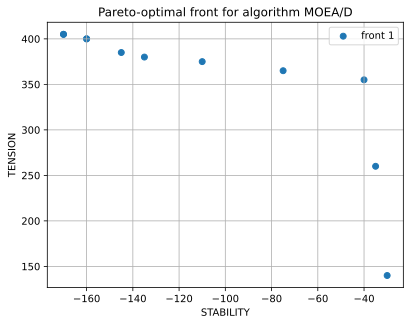

In [133]:
fig, ax = plt.subplots()
ax.set_title("Pareto-optimal front for algorithm MOEA/D")
for i, criterion in enumerate(metaParameters_df['criteria'].values[0]):
    if i == 0:
        ax.set_xlabel(criterion)
    else:
        ax.set_ylabel(criterion)
ax.grid()


ax.scatter(list_of_fronts[0], list_of_fronts[1], label = f"front 1")

plt.legend()
plt.show()
